In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import date, datetime, timedelta

## Visualize COVID-19 historical data

In [8]:
from global_config import config

data_path = config.get_property('covid_fb')


In [2]:
data_path = os.path.join('data')

In [3]:
# Read confirmed cases
df_cases_raw = pd.read_csv(os.path.join(data_path,'cases.csv'))        # read csv
df_cases_raw = df_cases_raw.query(" location == 'Bogotá D.C.-Bogotá d C.' ")    # get only for Bogotá
df_cases_raw['date_time'] = pd.to_datetime(df_cases_raw['date_time'], format='%Y-%m-%d')    # converted to datetime

# Perform rolling average over data
rolling_window_size = 7     # days
date_times = df_cases_raw['date_time'].tolist()

# Get data of interest
confirmed_cases = df_cases_raw['num_cases'].rolling(window=rolling_window_size).mean().tolist()
confirmed_deaths = df_cases_raw['num_diseased'].rolling(window=rolling_window_size).mean().tolist()
confirmed_hospital = df_cases_raw['num_infected_in_hospital'].rolling(window=rolling_window_size).mean().tolist()
confirmed_house = df_cases_raw['num_infected_in_house'].rolling(window=rolling_window_size).mean().tolist()

dict_cases = dict(zip(['date_time','confirmed_cases','confirmed_deaths','confirmed_hospital','confirmed_house'],
                      [date_times,confirmed_cases,confirmed_deaths,confirmed_hospital,confirmed_house]))

df_cases = pd.DataFrame(data=dict_cases)

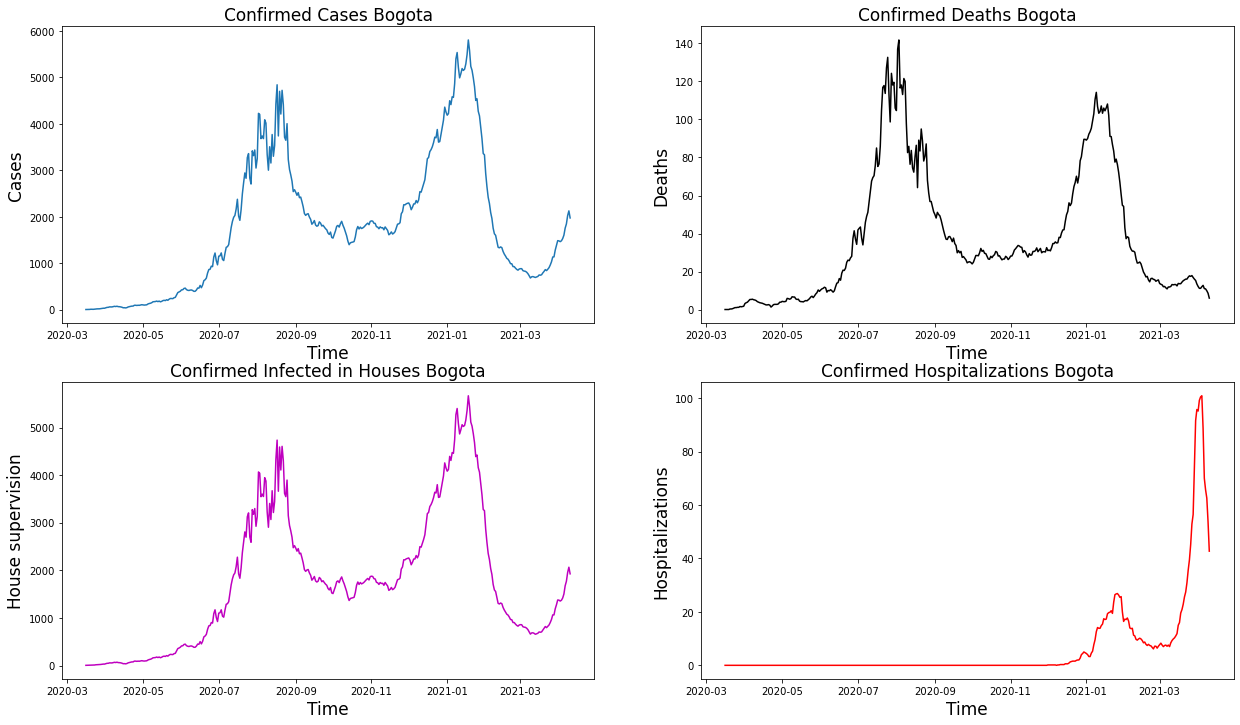

In [10]:
fig,ax = plt.subplots(2,2,figsize=(7*3, 6*2))

sns.lineplot(ax=ax[0,0], data=df_cases,x='date_time',y='confirmed_cases')
ax[0,0].set_xlabel('Time',fontsize=17)
ax[0,0].set_ylabel('Cases',fontsize=17)
ax[0,0].set_title('Confirmed Cases Bogota',fontsize=17)

sns.lineplot(ax=ax[0,1], data=df_cases,x='date_time',y='confirmed_deaths',color='k')
ax[0,1].set_xlabel('Time',fontsize=17)
ax[0,1].set_ylabel('Deaths',fontsize=17)
ax[0,1].set_title('Confirmed Deaths Bogota',fontsize=17)

sns.lineplot(ax=ax[1,0], data=df_cases,x='date_time',y='confirmed_house',color='m')
ax[1,0].set_xlabel('Time',fontsize=17)
ax[1,0].set_ylabel('House supervision',fontsize=17)
ax[1,0].set_title('Confirmed Infected in Houses Bogota',fontsize=17)

sns.lineplot(ax=ax[1,1], data=df_cases,x='date_time',y='confirmed_hospital',color='r')
ax[1,1].set_xlabel('Time',fontsize=17)
ax[1,1].set_ylabel('Hospitalizations',fontsize=17)
ax[1,1].set_title('Confirmed Hospitalizations Bogota',fontsize=17)

plt.show()

In [45]:
df_movement_range_raw["7d_rolling"] == np.nan

poly_id
11001    False
11001    False
11001    False
11001    False
11001    False
         ...  
11001    False
11001    False
11001    False
11001    False
11001    False
Name: 7d_rolling, Length: 279, dtype: bool

In [57]:
import numpy as np
rolling_window_size = 7     # days


df_movement_range_raw = pd.read_csv(os.path.join(data_path, 'movement_range.csv'), parse_dates=['date_time']).set_index('poly_id')
df_movement_raw       = pd.read_csv(os.path.join(data_path,'movement.csv'), parse_dates=['date_time']).set_index('start_poly_id')

df_movement_range_raw = df_movement_range_raw.loc[11001].sort_values(by='date_time')
df_movement_range_raw["7d_rolling"] = df_movement_range_raw['movement_change'].rolling(window=rolling_window_size).mean()

df_movement_range_raw["7d_rolling"].iloc[:rolling_window_size-1] = df_movement_range_raw["movement_change"].iloc[:rolling_window_size-1]


/Users/chaosdonkey06/conda/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


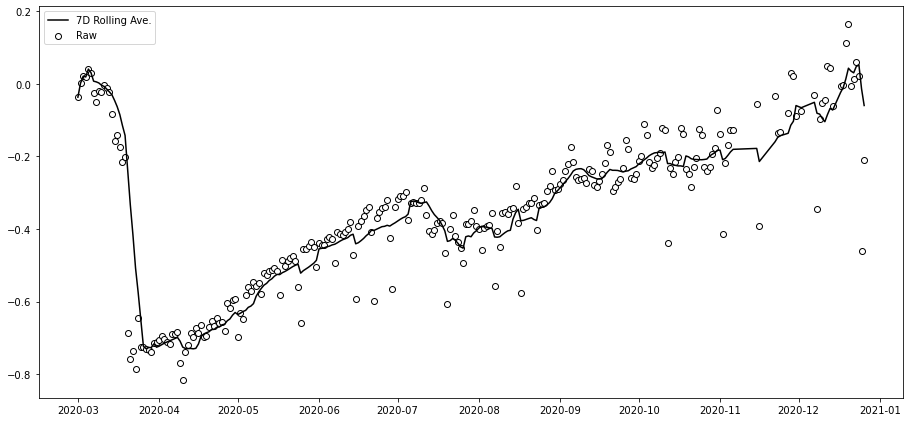

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(15.5, 7.2))
ax.scatter(df_movement_range_raw.date_time, df_movement_range_raw["movement_change"], facecolor='w', edgecolors='k', label='Raw')
ax.plot(df_movement_range_raw.date_time, df_movement_range_raw["7d_rolling"], color='k', label='7D Rolling Ave.')

ax.legend()

## Visualize mobility patterns

In [64]:
# Read mobility data
df_movement_range_raw = df_movement_range_raw.query(" poly_id == '11001' ")    # get only for Bogotá
df_movement_range_raw['date_time'] = pd.to_datetime(df_movement_range_raw['date_time'], format='%Y-%m-%d')    # converted to datetime

df_movement_raw = df_movement_raw.query(" end_poly_id == '11001' ")    # get only for people incomming to Bogotá
df_movement_raw['date_time'] = pd.to_datetime(df_movement_raw['date_time'], format='%Y-%m-%d')    # converted to datetime

# Perform rolling average over data
rolling_window_size = 7     # days
date_times_movement_range = df_movement_range_raw['date_time'].tolist()
date_times_movement       = df_movement_raw['date_time'].tolist()

# Get data of interest
movement_range = df_movement_range_raw['movement_change'].rolling(window=rolling_window_size).mean().tolist()
movement       = df_movement_raw['movement'].rolling(window=rolling_window_size).mean().tolist()

dict_movement_range = {'date_time':date_times_movement_range,'movement_change':movement_range}
df_movement_range = pd.DataFrame(data=dict_movement_range)
dict_movement = {'date_time':date_times_movement,'movement':movement}
df_movement = pd.DataFrame(data=dict_movement)

<ipython-input-64-bd4e14165be7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movement_raw['date_time'] = pd.to_datetime(df_movement_raw['date_time'], format='%Y-%m-%d')    # converted to datetime


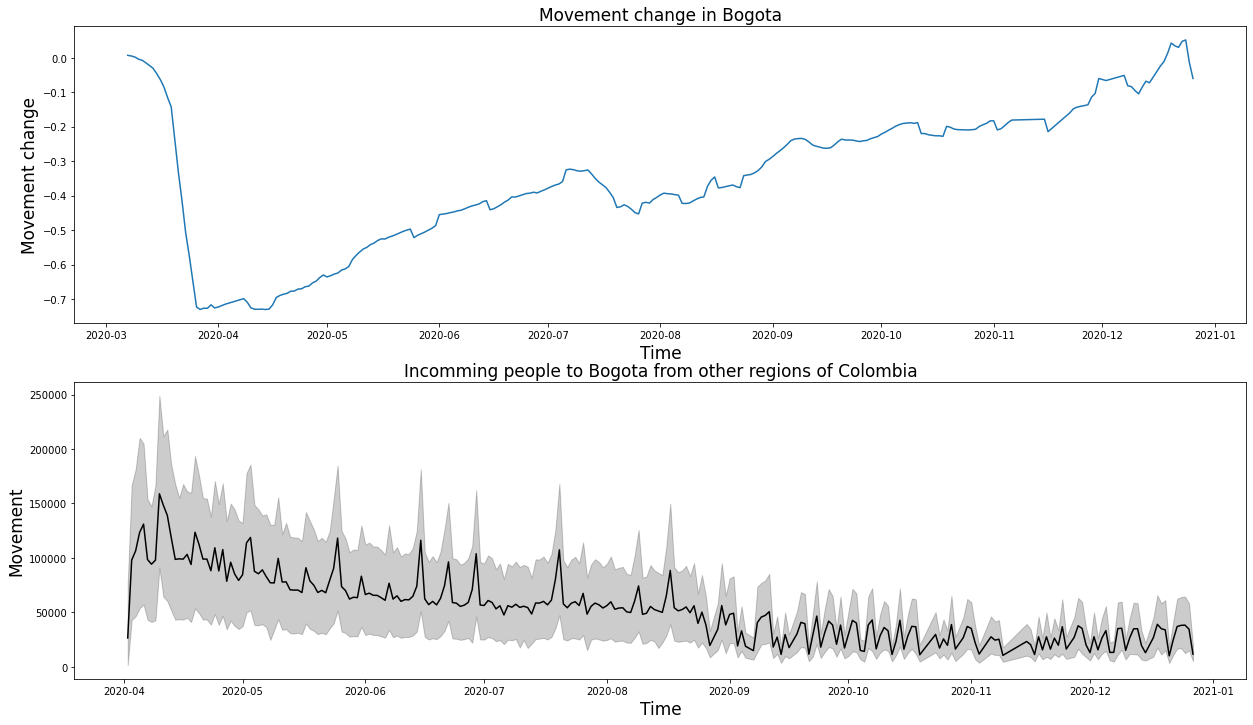

In [65]:
fig,ax = plt.subplots(2,1,figsize=(7*3, 6*2))

sns.lineplot(ax=ax[0], data=df_movement_range,x='date_time',y='movement_change')
ax[0].set_xlabel('Time',fontsize=17)
ax[0].set_ylabel('Movement change',fontsize=17)
ax[0].set_title('Movement change in Bogota',fontsize=17)

sns.lineplot(ax=ax[1], data=df_movement,x='date_time',y='movement',color='k')
ax[1].set_xlabel('Time',fontsize=17)
ax[1].set_ylabel('Movement',fontsize=17)
ax[1].set_title('Incomming people to Bogota from other regions of Colombia',fontsize=17)

plt.show()

## Visualize Google trends data
### Data corresponding to official symptoms of COVID-19, terms COVID-19-related terms with potential to track confirmed cases, and terms used to successfully track ILI activity.

In [9]:
# Import API for Google Trends
from pytrends.request import TrendReq
from pytrends import dailydata
from utils import gtrend

# Read search terms
df_search_terms   = pd.read_csv(os.path.join('data','Google_Trends','search_terms_ES.csv'))
search_terms_list = df_search_terms['term'].tolist()

### Test 'most common' keywords

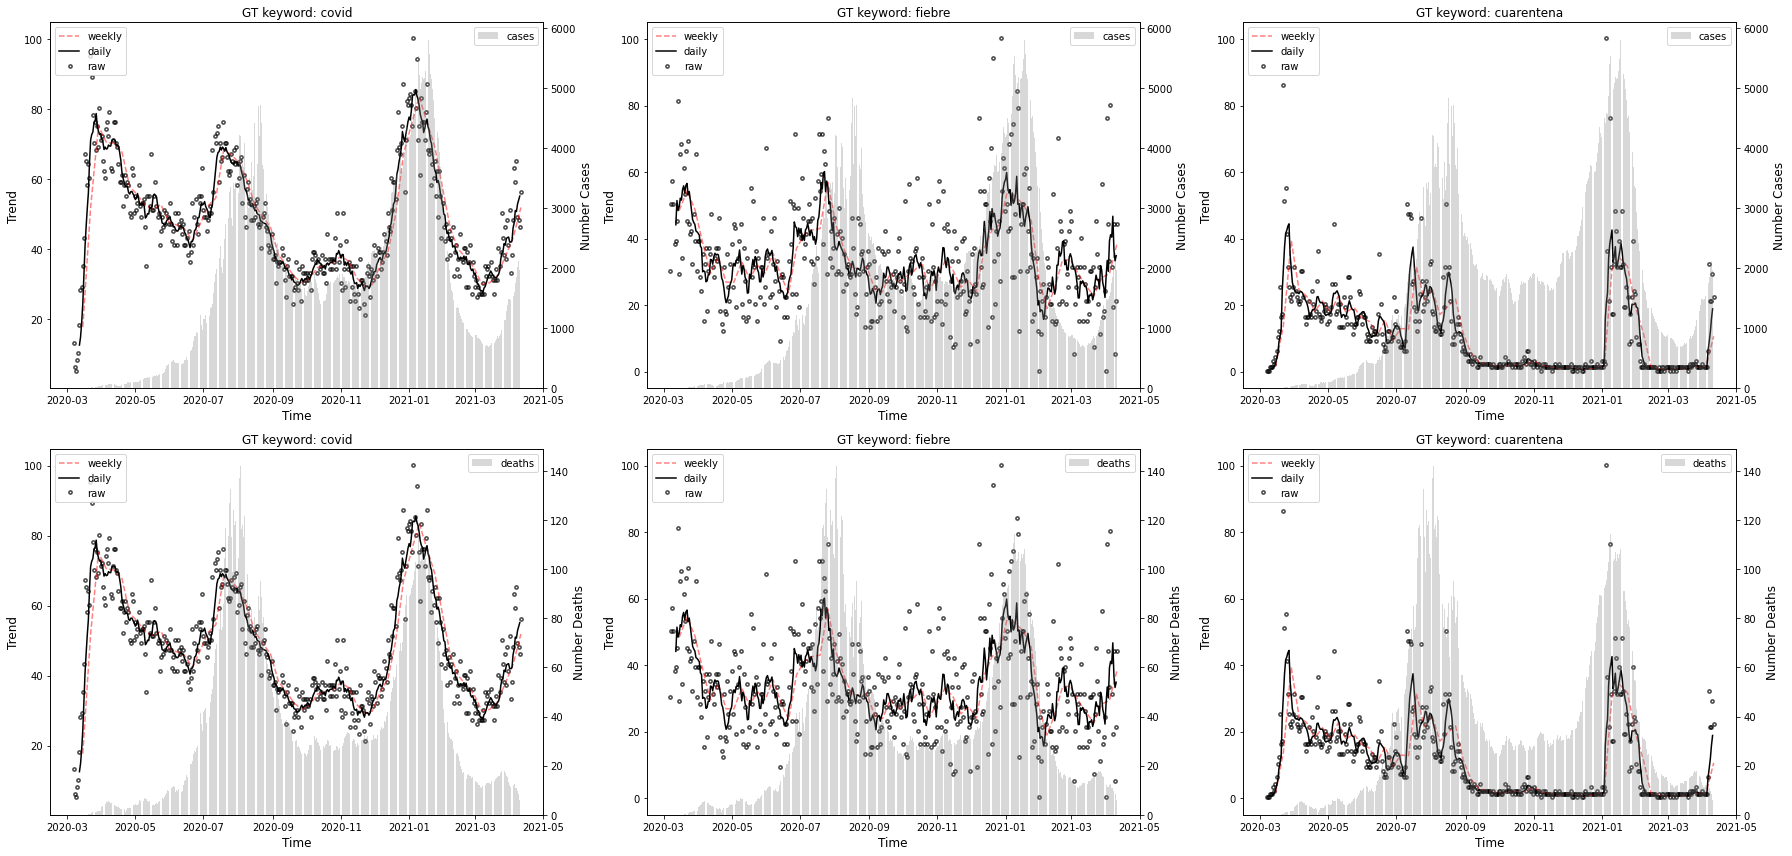

In [9]:
pytrend = TrendReq(hl='es-CO')
keywords_test = ['covid','fiebre','cuarentena']
start = '2020-03-06'
end = '2021-04-10'
geo = 'CO-DC'
cat=0
gprop=''
rolling_window_size = 7     # days

# Plot data
fig, ax = plt.subplots(2,3,figsize=(25, 12))
for i, kw in enumerate(keywords_test):
    # Read and process
    overlapping = gtrend.get_daily_trend(pytrend, kw, start, end, geo=geo, cat=cat, gprop=gprop, verbose=False)
    overlapping = overlapping.reset_index()
    overlapping["date"] = pd.to_datetime( overlapping["date"] )
    overlapping['rw'] = overlapping[kw].rolling(window=rolling_window_size).mean()
    overlapping["end_day"] = overlapping.apply(lambda x: x["date"] - timedelta(days=x['date'].weekday()) + timedelta(days=6), axis=1)
    overlapping_week = overlapping.groupby(['end_day']).mean().reset_index()
    # Plot GT
    ax[0,i].scatter(x=overlapping['date'], y=overlapping[kw], marker="$\circ$", color='k', alpha=0.5, label='raw')
    ax[0,i].plot(overlapping_week['end_day'], overlapping_week['rw'], color='r', linestyle='dashed', alpha=0.5, label='weekly')
    ax[0,i].plot(overlapping['date'], overlapping['rw'], color='k', label='daily')
    ax[0,i].legend(loc='upper left')
    ax[0,i].set_xlabel('Time',fontsize=12)
    ax[0,i].set_ylabel('Trend',fontsize=12)
    ax[0,i].set_title(f'GT keyword: {kw}',fontsize=12)
    # Plot cases
    ax1 = ax[0,i].twinx()
    ax1.bar(df_cases['date_time'], df_cases['confirmed_cases'], color='gray', alpha=0.3, label='cases')
    ax1.set_ylabel('Number Cases',fontsize=12)
    ax1.legend(loc='upper right')
    # Plot GT
    ax[1,i].scatter(x=overlapping['date'], y=overlapping[kw], marker="$\circ$", color='k', alpha=0.5, label='raw')
        ax[1,i].plot(overlapping_week['end_day'], overlapping_week['rw'], color='r', linestyle='dashed', alpha=0.5, label='weekly')
    ax[1,i].plot(overlapping['date'], overlapping['rw'], color='k', label='daily')
    ax[1,i].legend(loc='upper left')
    ax[1,i].set_xlabel('Time',fontsize=12)
    ax[1,i].set_ylabel('Trend',fontsize=12)
    ax[1,i].set_title(f'GT keyword: {kw}',fontsize=12)
    # Plot deaths
    ax2 = ax[1,i].twinx()
    ax2.bar(df_cases['date_time'], df_cases['confirmed_deaths'], color='gray', alpha=0.3, label='deaths')
    ax2.set_ylabel('Number Deaths',fontsize=12)
    ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

### Using related terms

In [10]:
# Read files containing main termss
df_main_terms = pd.read_csv(os.path.join('data','Google_Trends','terms_id_ES.csv'))

In [10]:
pytrend = TrendReq(hl='es-CO')
start = '2020-03-06'
end = '2021-04-10'
geo = 'CO-DC'
cat = 0
gprop=''

list_df_trends = []
from tqdm import tqdm
for i, row in tqdm(df_search_terms.iterrows(), total=len(search_terms_list)):
    print('Processing - ' + str(row['term']))
    get_trend = gtrend.get_daily_trend(pytrend, row['term'], start, end, geo=geo, cat=cat, gprop=gprop, verbose=False)
    get_trend = get_trend.reset_index()
    get_trend['date'] = pd.to_datetime( get_trend['date'] )
    list_df_trends.append(get_trend)

 97%|█████████▋| 114/117 [05:06<00:08,  2.68s/it]Processing - sintomas de bronquitis
/Users/samueltorres/Documents/Projects/covid19_forecast_ml/utils/gtrend.py:82: RuntimeWarning: divide by zero encountered in long_scalars
  coef = y2/y1
100%|██████████| 117/117 [05:13<00:00,  2.68s/it]


In [26]:
df_trends = pd.DataFrame()
df_trends['date'] = list_df_trends[0]['date']
for i, trend in enumerate(search_terms_list):
    df_trends[trend] = list_df_trends[i][trend]
df_trends.to_csv(os.path.join(data_path,'Google_Trends','trends_BOG.csv'))

In [33]:
df_trends_BOG = pd.read_csv(os.path.join(data_path,'Google_Trends','trends_BOG.csv'),index_col=1)

In [45]:
df_trends_BOG_anosmia = df_trends_BOG['anosmia']
df_trends_BOG_anosmia - df_trends_BOG_anosmia.mean()/df_trends_BOG_anosmia.std

date
2020-03-06     0.0
2020-03-07     0.0
2020-03-08     0.0
2020-03-09     0.0
2020-03-10     0.0
              ... 
2021-04-06     0.0
2021-04-07     0.0
2021-04-08    43.0
2021-04-09     0.0
2021-04-10     0.0
Name: anosmia, Length: 401, dtype: float64

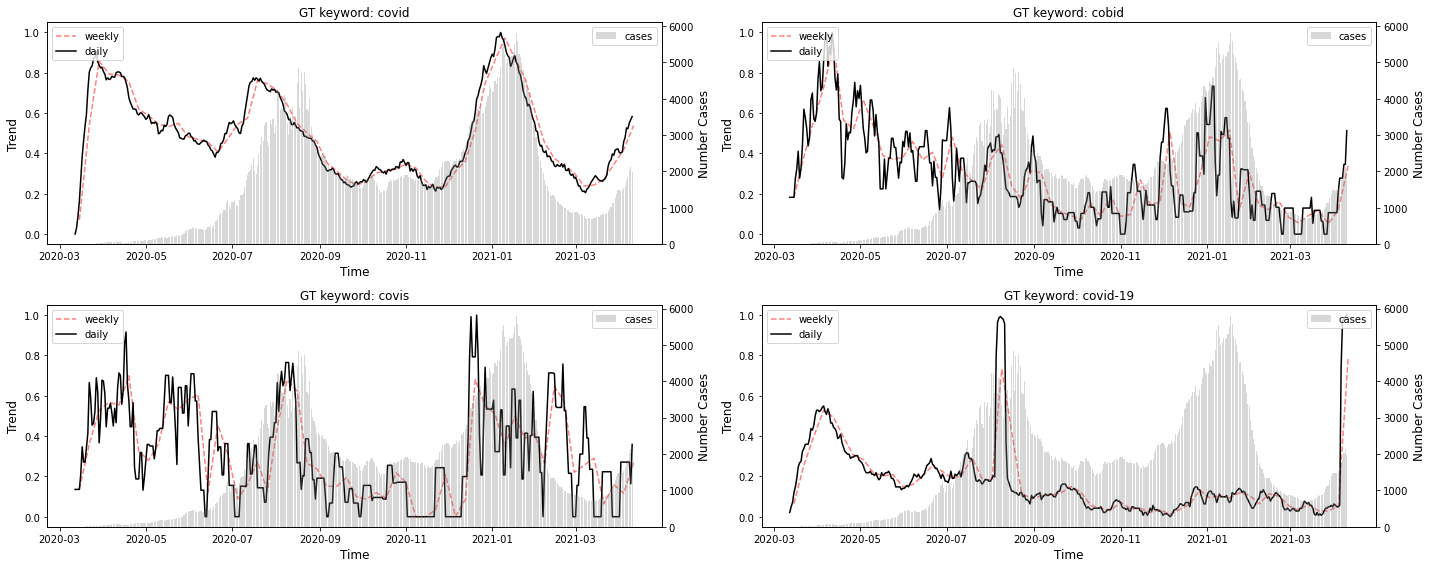

In [53]:
related_words_test = ['covid','cobid','covis','covid-19']
fig, ax = plt.subplots(2,2,figsize=(20, 8))
ax = ax.flatten()
for i, kw in enumerate(related_words_test):
    kw_trend = df_trends_BOG[kw]
    kw_trend = kw_trend.reset_index()
    kw_trend["date"] = pd.to_datetime( kw_trend["date"] )
    # kw_trend[kw]   = (kw_trend[kw] - kw_trend[kw].min())/(kw_trend[kw].max() - kw_trend[kw].min())
    kw_trend['rw'] = kw_trend[kw].rolling(window=rolling_window_size).mean()
    kw_trend['rw']   = (kw_trend['rw'] - kw_trend['rw'].min())/(kw_trend['rw'].max() - kw_trend['rw'].min())
    kw_trend["end_day"] = kw_trend.apply(lambda x: x["date"] - timedelta(days=x['date'].weekday()) + timedelta(days=6), axis=1)
    kw_trend_week = kw_trend.groupby(['end_day']).mean().reset_index()
        # Plot GT
    # ax[i].scatter(x=kw_trend['date'], y=kw_trend[kw], marker="$\circ$", color='k', alpha=0.5, label='raw')
    ax[i].plot(kw_trend_week['end_day'], kw_trend_week['rw'], color='r', linestyle='dashed', alpha=0.5, label='weekly')
    ax[i].plot(kw_trend['date'], kw_trend['rw'], color='k', label='daily')
    ax[i].legend(loc='upper left')
    ax[i].set_xlabel('Time',fontsize=12)
    ax[i].set_ylabel('Trend',fontsize=12)
    ax[i].set_title(f'GT keyword: {kw}',fontsize=12)
    # Plot cases
    ax1 = ax[i].twinx()
    ax1.bar(df_cases['date_time'], df_cases['confirmed_cases'], color='gray', alpha=0.3, label='cases')
    ax1.set_ylabel('Number Cases',fontsize=12)
    ax1.legend(loc='upper right')

plt.tight_layout()
plt.show()